In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets 
from sklearn import preprocessing 
from sklearn import linear_model 
from sklearn import model_selection as ms 

In [5]:
cancer_data = datasets.load_breast_cancer()

# Training labels ("malignant = 0, benign = 1")
y = cancer_data.target 

# 30 attributes
X = cancer_data.data

# scale each data attribute to zero-mean and unit variance
X = preprocessing.scale(X) 

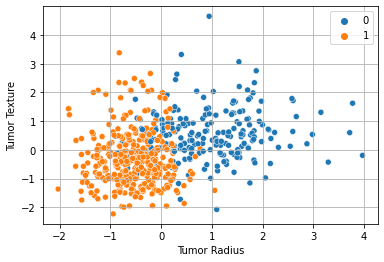

In [7]:
# Plot the first 2 attributes of training points 

sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel("Tumor Radius")
plt.ylabel("Tumor Texture")
plt.grid(True)
plt.show()

In [8]:
# Range of hyperparameter values 1e-15 to 1 in increments of 0.005
alpha = np.arange(1e-15, 1, 0.005) 

# Initialize validation score for each alpha value 
val_score = np.zeros((len(alpha), 1))

for i in range(len(alpha)):
    # Set up SVM with hinge loss and L2 norm regularization
    model = linear_model.SGDClassifier(loss="hinge", penalty="l2",                                              alpha=alpha[i])
    # Calculate cross validation scores for 5-fold cross validation
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

TypeError: Cannot interpret '1' as a data type